---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [1]:
import pandas as pd
import numpy as np

def blight_model():
    
    # Your code here
    
    return # Your answer here

In [2]:
import datetime

In [ ]:
blight_model()

### Load data

In [3]:
train_data = pd.read_csv("train.csv",delimiter=",",encoding='ISO-8859-1')

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
ticket_id                     250306 non-null int64
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null obj

#### select non-Null target values from train data

In [5]:
train_data.compliance.value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

In [6]:
train_data = train_data[~(train_data.compliance.isnull())]
train_data.shape

(159880, 34)

#### Conbine train data, addresses data and latlons data

In [7]:
addresses_data = pd.read_csv("addresses.csv",delimiter=",")

In [8]:
latlons_data = pd.read_csv("latlons.csv",delimiter=",")

In [9]:
add_loc_data = pd.merge(addresses_data,latlons_data,on="address")

In [10]:
add_loc_data.head()

,ticket_id,address,lat,lon
0,22056,"2900 tyler, Detroit MI",42.390729,-83.124268
1,77242,"2900 tyler, Detroit MI",42.390729,-83.124268
2,77243,"2900 tyler, Detroit MI",42.390729,-83.124268
3,103945,"2900 tyler, Detroit MI",42.390729,-83.124268
4,138219,"2900 tyler, Detroit MI",42.390729,-83.124268


In [11]:
train_data = pd.merge(train_data,add_loc_data,on="ticket_id")
train_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,NaN,2755.0,E. 17TH,LOG BEACH,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"6478 northfield, Detroit MI",42.145257,-83.208233
3,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",8027.0,BRENTWOOD,NaN,476.0,Garfield,Clinton,...,855.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"8027 brentwood, Detroit MI",42.433466,-83.023493
4,18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,NaN,8228.0,Mt. Elliott,Detroit,...,140.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"8228 mt elliott, Detroit MI",42.388641,-83.037858


#### Delete violation address and mailing address(except for zipcode) and grafitti_status which contains all NaN values

In [12]:
train_data = train_data.drop(["violation_street_number","violation_street_name","violation_zip_code",
                 "mailing_address_str_number","mailing_address_str_name","city","state","country",
                 "non_us_str_code","grafitti_status","address"],axis = 1)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159880 entries, 0 to 159879
Data columns (total 26 columns):
ticket_id                159880 non-null int64
agency_name              159880 non-null object
inspector_name           159880 non-null object
violator_name            159854 non-null object
zip_code                 159879 non-null object
ticket_issued_date       159880 non-null object
hearing_date             159653 non-null object
violation_code           159880 non-null object
violation_description    159880 non-null object
disposition              159880 non-null object
fine_amount              159880 non-null float64
admin_fee                159880 non-null float64
state_fee                159880 non-null float64
late_fee                 159880 non-null float64
discount_amount          159880 non-null float64
clean_up_cost            159880 non-null float64
judgment_amount          159880 non-null float64
payment_amount           159880 non-null float64
balance_due       

#### Delete the obs with wrong zip_code

In [14]:
bad_zipcode = train_data.zip_code[train_data.zip_code.apply(lambda x: len(str(x)) != 5)].index
bad_zipcode

Int64Index([     2,    336,    492,    584,    680,    997,   1009,   1487,
              1502,   1577,
            ...
            159179, 159190, 159307, 159324, 159410, 159466, 159635, 159751,
            159769, 159801],
           dtype='int64', length=1049)

In [15]:
train_data.drop(bad_zipcode,axis = 0,inplace=True)

In [16]:
train_data.shape

(158831, 26)

In [17]:
train_data.zip_code = train_data.zip_code.astype("int64")

In [18]:
train_data = train_data[~(train_data.hearing_date.isnull())]
train_data.shape

(158607, 26)

In [19]:
train_data.payment_status.value_counts()

NO PAYMENT APPLIED         119450
PAID IN FULL                30049
PARTIAL PAYMENT APPLIED      9108
Name: payment_status, dtype: int64

In [20]:
train_data.drop(["payment_date","collection_status","payment_status"],1,inplace=True)

In [21]:
train_data.drop(["payment_amount","balance_due","compliance_detail"],1,inplace= True)

In [22]:
train_data = train_data[~(train_data.lat.isnull())]

In [23]:
train_data.drop("violator_name",1,inplace=True)

In [24]:
train_data.drop("ticket_id",1,inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158605 entries, 0 to 159879
Data columns (total 18 columns):
agency_name              158605 non-null object
inspector_name           158605 non-null object
zip_code                 158605 non-null int64
ticket_issued_date       158605 non-null object
hearing_date             158605 non-null object
violation_code           158605 non-null object
violation_description    158605 non-null object
disposition              158605 non-null object
fine_amount              158605 non-null float64
admin_fee                158605 non-null float64
state_fee                158605 non-null float64
late_fee                 158605 non-null float64
discount_amount          158605 non-null float64
clean_up_cost            158605 non-null float64
judgment_amount          158605 non-null float64
compliance               158605 non-null float64
lat                      158605 non-null float64
lon                      158605 non-null float64
dtypes: float64(

### Exam object variables
    agency_name              250306 non-null object
    inspector_name           250306 non-null object
    ticket_issued_date       158605 non-null object
    hearing_date             158605 non-null object
    violation_code           158605 non-null object
    violation_description    158605 non-null object
    disposition              158605 non-null object

In [26]:
for col in train_data.columns[train_data.dtypes == "object"]:
    print("The number of unique values for '{}' is {}.".format(col,train_data[col].nunique()))

The number of unique values for 'agency_name' is 5.
The number of unique values for 'inspector_name' is 159.
The number of unique values for 'ticket_issued_date' is 67747.
The number of unique values for 'hearing_date' is 5966.
The number of unique values for 'violation_code' is 189.
The number of unique values for 'violation_description' is 207.
The number of unique values for 'disposition' is 4.


In [27]:
train_data.disposition.value_counts()

Responsible by Default                137305
Responsible by Admission               13573
Responsible by Determination            7538
Responsible (Fine Waived) by Deter       189
Name: disposition, dtype: int64

In [29]:
test_data = pd.read_csv("test.csv",delimiter=",",encoding="ISO-8859-1")

In [31]:
for col in test_data.columns[test_data.dtypes == "object"]:
    print("The number of unique values for '{}' is {}.".format(col,test_data[col].nunique()))

The number of unique values for 'agency_name' is 3.
The number of unique values for 'inspector_name' is 116.
The number of unique values for 'violator_name' is 38515.
The number of unique values for 'violation_street_name' is 1477.
The number of unique values for 'violation_zip_code' is 58.
The number of unique values for 'mailing_address_str_number' is 9703.
The number of unique values for 'mailing_address_str_name' is 16851.
The number of unique values for 'city' is 3266.
The number of unique values for 'state' is 58.
The number of unique values for 'zip_code' is 2900.
The number of unique values for 'country' is 1.
The number of unique values for 'ticket_issued_date' is 33064.
The number of unique values for 'hearing_date' is 3312.
The number of unique values for 'violation_code' is 151.
The number of unique values for 'violation_description' is 163.
The number of unique values for 'disposition' is 8.
The number of unique values for 'grafitti_status' is 1.


### Change date columns('ticket_issued_date', 'hearing_date') into datetime format and extract year, week of year, and day of week information

In [32]:
train_data.ticket_issued_date = pd.to_datetime(train_data.ticket_issued_date)

In [33]:
train_data.ticket_issued_date.head()

0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
3   2004-06-14 14:15:00
4   2004-06-16 12:30:00
5   2004-06-16 12:25:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [34]:
train_data["year"] = [date.isocalendar()[0] for date in train_data.ticket_issued_date]

In [35]:
train_data["woy"] = [date.isocalendar()[1] for date in train_data.ticket_issued_date]

In [36]:
train_data["dow"] = [date.isocalendar()[2] for date in train_data.ticket_issued_date]

In [37]:
train_data.hearing_date = pd.to_datetime(train_data.hearing_date)
train_data["h_year"] = [date.isocalendar()[0] for date in train_data.hearing_date]
train_data["h_woy"] = [date.isocalendar()[1] for date in train_data.hearing_date]
train_data["h_dow"] = [date.isocalendar()[2] for date in train_data.hearing_date]

In [38]:
train_data.drop(["ticket_issued_date","hearing_date"],1,inplace=True)

In [39]:
train_data.drop("violation_code",1,inplace=True)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158605 entries, 0 to 159879
Data columns (total 21 columns):
agency_name              158605 non-null object
inspector_name           158605 non-null object
zip_code                 158605 non-null int64
violation_description    158605 non-null object
disposition              158605 non-null object
fine_amount              158605 non-null float64
admin_fee                158605 non-null float64
state_fee                158605 non-null float64
late_fee                 158605 non-null float64
discount_amount          158605 non-null float64
clean_up_cost            158605 non-null float64
judgment_amount          158605 non-null float64
compliance               158605 non-null float64
lat                      158605 non-null float64
lon                      158605 non-null float64
year                     158605 non-null int64
woy                      158605 non-null int64
dow                      158605 non-null int64
h_year             

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
corr = train_data.corr()

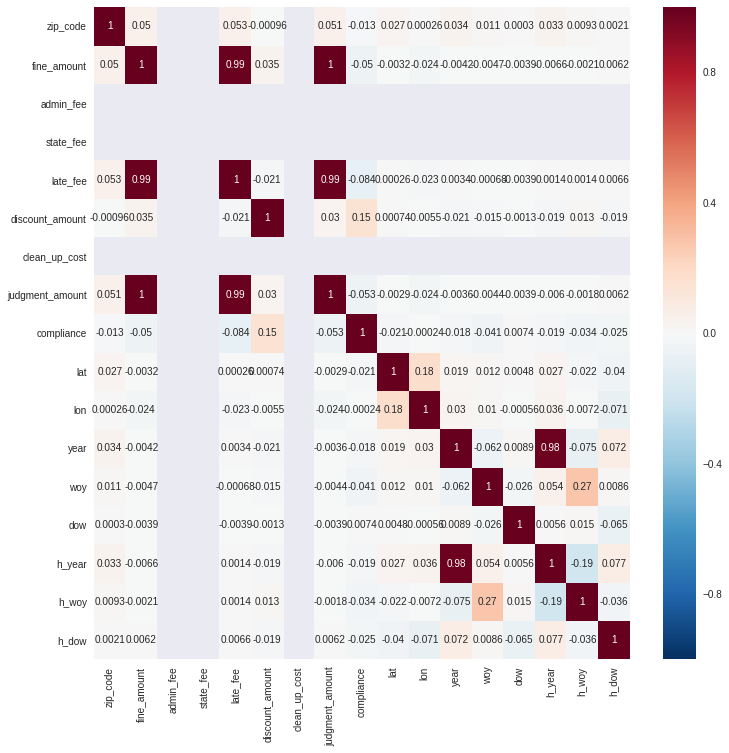

In [43]:
%matplotlib inline
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

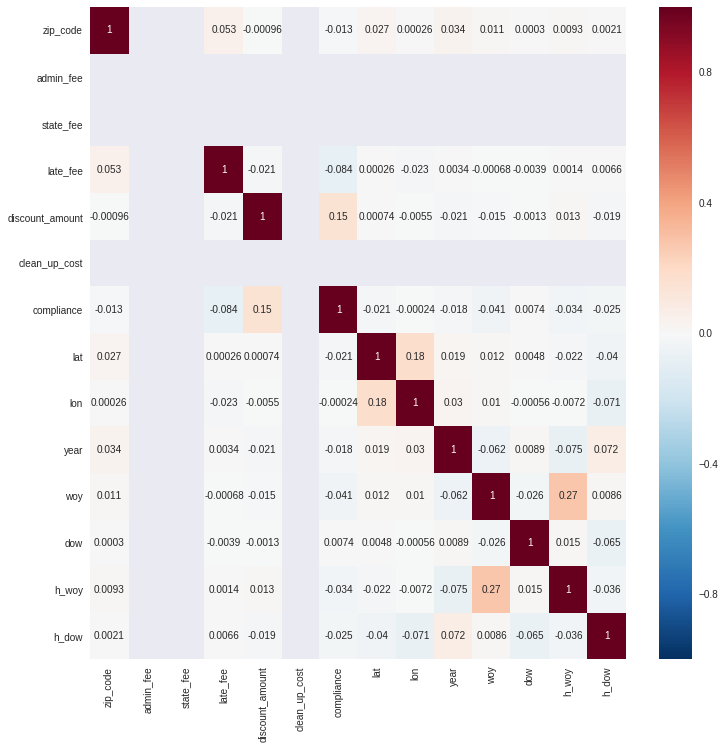

In [44]:
%matplotlib inline
plt.figure(figsize=(12,12))
sns.heatmap(train_data.drop(["h_year","fine_amount","judgment_amount"],1).corr(),annot=True)

In [45]:
train_data.drop(["h_year","fine_amount","judgment_amount"],1,inplace=True)

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158605 entries, 0 to 159879
Data columns (total 18 columns):
agency_name              158605 non-null object
inspector_name           158605 non-null object
zip_code                 158605 non-null int64
violation_description    158605 non-null object
disposition              158605 non-null object
admin_fee                158605 non-null float64
state_fee                158605 non-null float64
late_fee                 158605 non-null float64
discount_amount          158605 non-null float64
clean_up_cost            158605 non-null float64
compliance               158605 non-null float64
lat                      158605 non-null float64
lon                      158605 non-null float64
year                     158605 non-null int64
woy                      158605 non-null int64
dow                      158605 non-null int64
h_woy                    158605 non-null int64
h_dow                    158605 non-null int64
dtypes: float64(8), int

# Do not forget fit labelencoder on both train and test data at same time at end

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train_data.columns[train_data.dtypes == "object"]:
    train_data[col] = le.fit_transform(train_data[col])

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158605 entries, 0 to 159879
Data columns (total 18 columns):
agency_name              158605 non-null int64
inspector_name           158605 non-null int64
zip_code                 158605 non-null int64
violation_description    158605 non-null int64
disposition              158605 non-null int64
admin_fee                158605 non-null float64
state_fee                158605 non-null float64
late_fee                 158605 non-null float64
discount_amount          158605 non-null float64
clean_up_cost            158605 non-null float64
compliance               158605 non-null float64
lat                      158605 non-null float64
lon                      158605 non-null float64
year                     158605 non-null int64
woy                      158605 non-null int64
dow                      158605 non-null int64
h_woy                    158605 non-null int64
h_dow                    158605 non-null int64
dtypes: float64(8), int64(1

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [128]:
cv = StratifiedKFold(n_splits=5)
scaler  = MinMaxScaler()
clfs = [LogisticRegression(),GaussianNB(),
       RandomForestClassifier(random_state=0,n_estimators=100),AdaBoostClassifier()]

X = train_data.drop("compliance",1)
y = train_data.compliance

for clf in clfs:
    print(clf)
    for train, test in cv.split(X,y):
        X_train = scaler.fit_transform(X.iloc[train])
        X_test = scaler.transform(X.iloc[test])
        clf.fit(X_train,y.iloc[train])
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fpr, tpr, _ = roc_curve(y.iloc[test], prob_pos)
        auc_score = auc(fpr,tpr)
        print(auc_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.670410201732
0.689655612544
0.703355577367
0.662813798945
0.689035882001
GaussianNB(priors=None)
0.784572923815
0.751614176083
0.810751064504
0.762176584884
0.72070840107
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
0.636822169407
0.614131357852
0.695550299958
0.615292890873
0.690221406031
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, ra

### As we can see from the results, the GaussianNB and AdaBoostClassifier give us better profromence. So we  will use these two classifier to tune our models.

In [ ]:
param_grid = {"n_estimators":[10,100],"learning_rate":[0.01,0.1,1]}
ada = AdaBoostClassifier()
gs = GridSearchCV(ada,param_grid=param_grid,cv=5,scoring="roc_auc")
gs.fit(X,y)



In [154]:
cv = StratifiedKFold(n_splits=10)
scaler  = MinMaxScaler()
clfs = [GaussianNB(),AdaBoostClassifier(learning_rate=0.5, n_estimators=100)]

X = train_data.drop("compliance",1)
y = train_data.compliance

for clf in clfs:
    print(clf)
    sc = []
    for train, test in cv.split(X,y):
        X_train = scaler.fit_transform(X.iloc[train])
        X_test = scaler.transform(X.iloc[test])
        clf.fit(X_train,y.iloc[train])
        prob_pos = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y.iloc[test], prob_pos)
        sc.append(auc(fpr,tpr))
    print(np.mean(sc))

GaussianNB(priors=None)
0.761055931107
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=100, random_state=None)
0.76508600177
